<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# GARCH Lab

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Load the data and log-transform `tb1`

In [2]:
from statsmodels.datasets import get_rdataset

In [3]:
data = get_rdataset('Mishkin', package='Ecdat')
df = data.data
df['log_tb1'] = np.log(df['tb1'])
df.head()

,pai1,pai3,tb1,tb3,cpi,log_tb1
0,-3.552289,1.129370,1.100854,1.129406,23.5,0.096086
1,5.247540,4.001566,1.125513,1.137254,23.6,0.118239
2,1.692860,4.492160,1.115715,1.142319,23.6,0.109495
3,5.064298,7.817513,1.146380,1.177902,23.7,0.136609
4,6.719322,9.433580,1.158520,1.167777,23.8,0.147143


### Visualize the time series. Would differencing be useful?

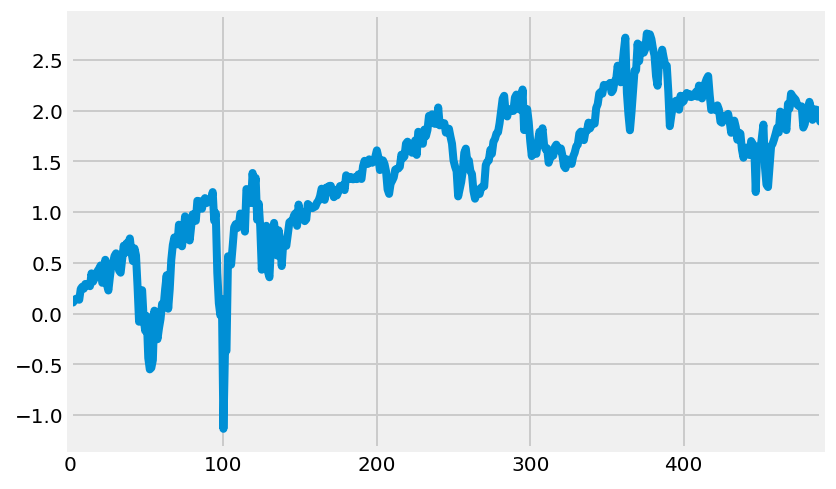

In [4]:
df.log_tb1.plot()
plt.show()

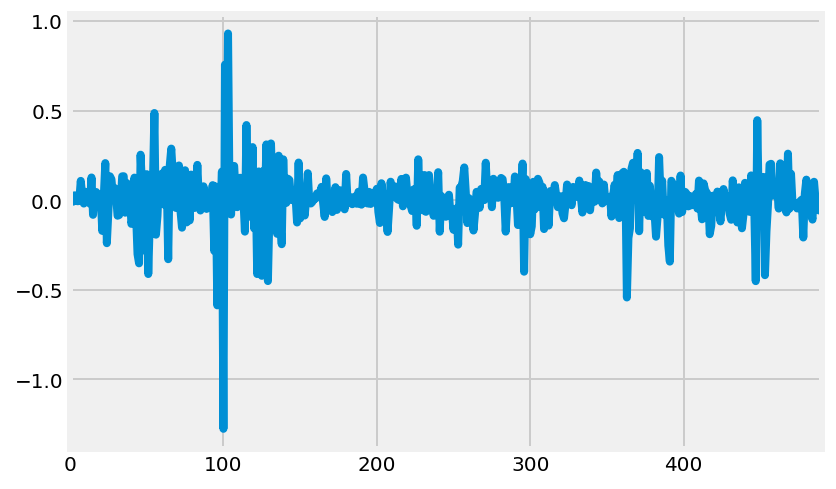

In [5]:
df.log_tb1.diff().plot()
plt.show()

### Fit a GARCH model

In [6]:
from arch import arch_model

In [7]:
data = df[['log_tb1']].diff()[1:]

In [8]:
am = arch_model(data, mean='AR', lags=3, vol='Constant')
res = am.fit(update_freq=7)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     AR - Constant Variance Model Results                     
==============================================================================
Dep. Variable:                log_tb1   R-squared:                       0.033
Mean Model:                        AR   Adj. R-squared:                  0.027
Vol Model:          Constant Variance   Log-Likelihood:                243.056
Distribution:                  Normal   AIC:                          -476.112
Method:            Maximum Likelihood   BIC:                          -455.170
                                        No. Observations:                  487
Date:                Tue, Aug 20 2019   Df Residuals:                      482
Time:                        08:59:11   Df Model:                            5
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const      4.6662e-03  6.868e-03      0.679      0.497 [-8.796e-03,1.813e-02]
log_tb1[1]    -0.1694  8.513e-02     -1.990  4.664e-02   [ -0.336,-2.519e-03]
log_tb1[2]    -0.0247  6.587e-02     -0.375      0.708      [ -0.154,  0.104]
log_tb1[3]    -0.0755      0.112     -0.671      0.502      [ -0.296,  0.145]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
sigma2         0.0216  4.021e-03      5.367  8.005e-08 [1.370e-02,2.946e-02]
============================================================================

Covariance estimator: White's Heteroskedasticity Consistent Estimator
"""

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

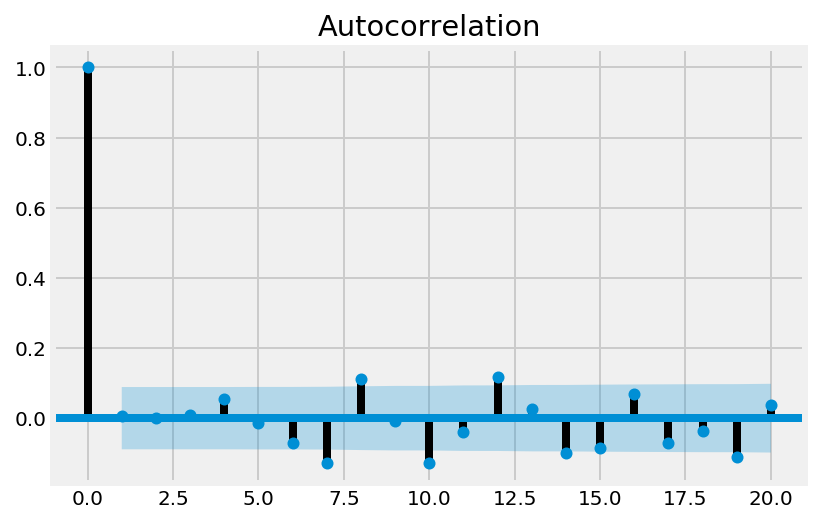

In [10]:
plot_acf(res.resid.dropna(), lags=20)
plt.show()

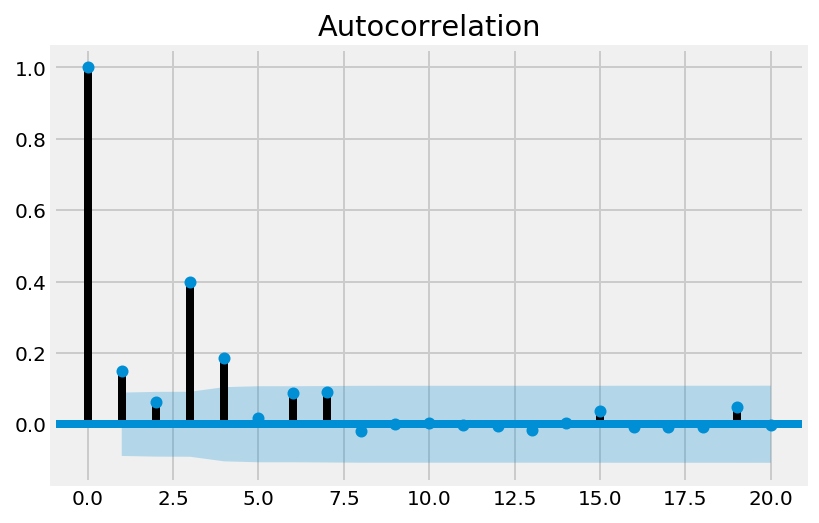

In [11]:
plot_acf(res.resid.dropna()**2, lags=20)
plt.show()

In [12]:
am = arch_model(data, mean='AR', lags=3, vol='GARCH', p=3, q=3)
res = am.fit(update_freq=7)
res.summary()

Iteration:      7,   Func. Count:    103,   Neg. LLF: -345.0340973057631
Iteration:     14,   Func. Count:    202,   Neg. LLF: -350.42078708200097
Iteration:     21,   Func. Count:    294,   Neg. LLF: -350.97689429179513
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -350.9768943279537
            Iterations: 21
            Function evaluations: 294
            Gradient evaluations: 21


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                log_tb1   R-squared:                       0.013
Mean Model:                        AR   Adj. R-squared:                  0.007
Vol Model:                      GARCH   Log-Likelihood:                350.977
Distribution:                  Normal   AIC:                          -679.954
Method:            Maximum Likelihood   BIC:                          -633.883
                                        No. Observations:                  487
Date:                Tue, Aug 20 2019   Df Residuals:                      476
Time:                        08:59:11   Df Model:                           11
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const      8.0318e-03  5.479e-03      1.466      0.143 [-2.706e-03,1.877e-02]
log_tb1[1]    -0.1605  6.441e-02     -2.491  1.273e-02   [ -0.287,-3.422e-02]
log_tb1[2]    -0.1137  5.654e-02     -2.011  4.428e-02   [ -0.225,-2.912e-03]
log_tb1[3]     0.0187  6.448e-02      0.291      0.771      [ -0.108,  0.145]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.6307e-03  1.757e-03      1.497      0.134 [-8.133e-04,6.075e-03]
alpha[1]       0.2713      0.107      2.529  1.145e-02    [6.100e-02,  0.482]
alpha[2]       0.0492      0.181      0.272      0.786      [ -0.305,  0.404]
alpha[3]       0.2122      0.401      0.529      0.597      [ -0.574,  0.999]
beta[1]        0.4014      0.368      1.091      0.275      [ -0.319,  1.122]
beta[2]        0.0000      0.718      0.000      1.000      [ -1.407,  1.407]
beta[3]    3.2137e-11      0.538  5.975e-11      1.000      [ -1.054,  1.054]
=============================================================================

Covariance estimator: robust
"""

### Obtain the model score

In [13]:
res.rsquared

0.012899393694665529

### Look at the distribution of the residuals

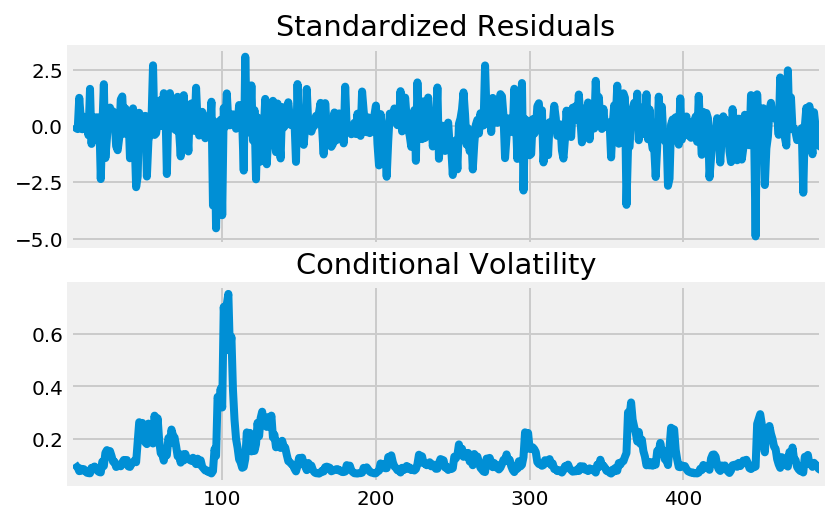

In [14]:
res.plot()
plt.show()

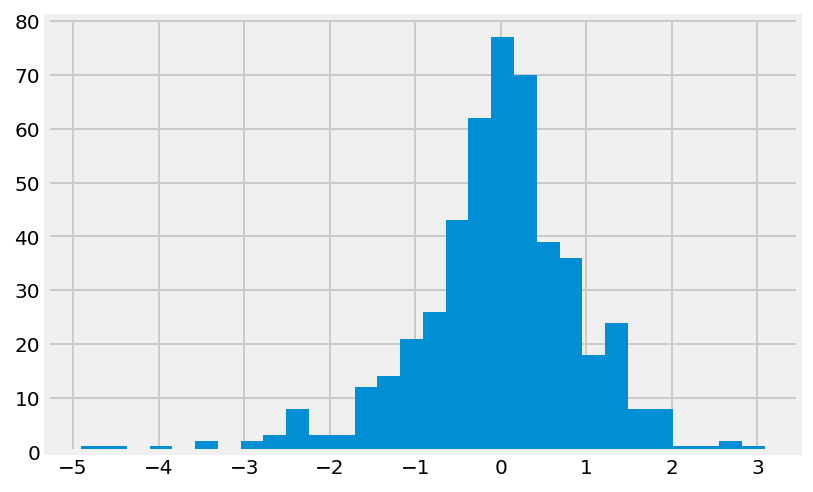

In [15]:
resid_standardized = (res.resid/res.conditional_volatility)
resid_standardized.hist(bins=30)
plt.show()

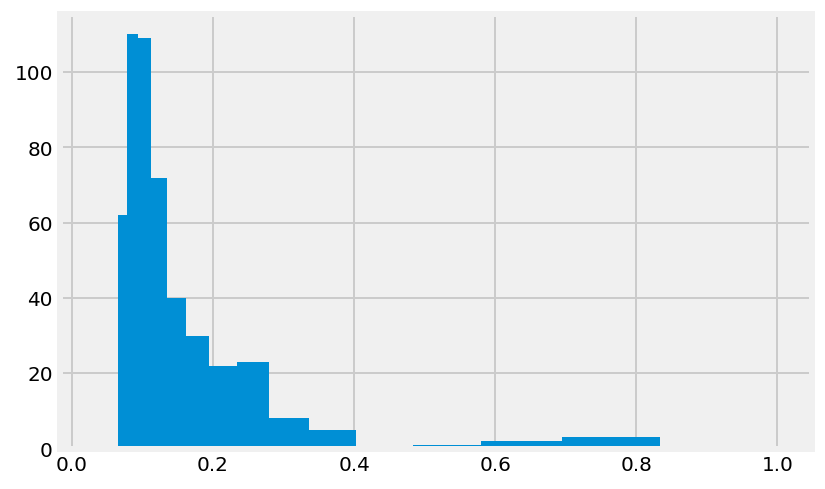

In [16]:
res.conditional_volatility.hist(bins=np.logspace(-1.5,0,20))
plt.show()

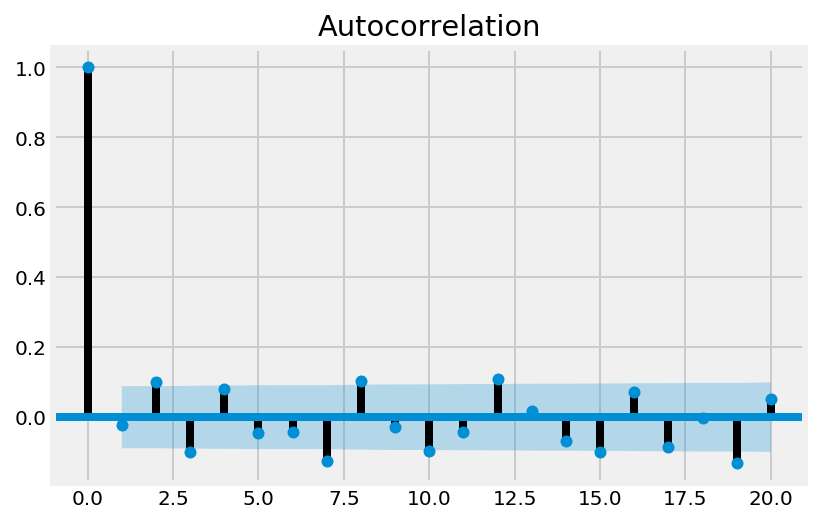

In [17]:
plot_acf(res.resid.dropna(), lags=20)
plt.show()

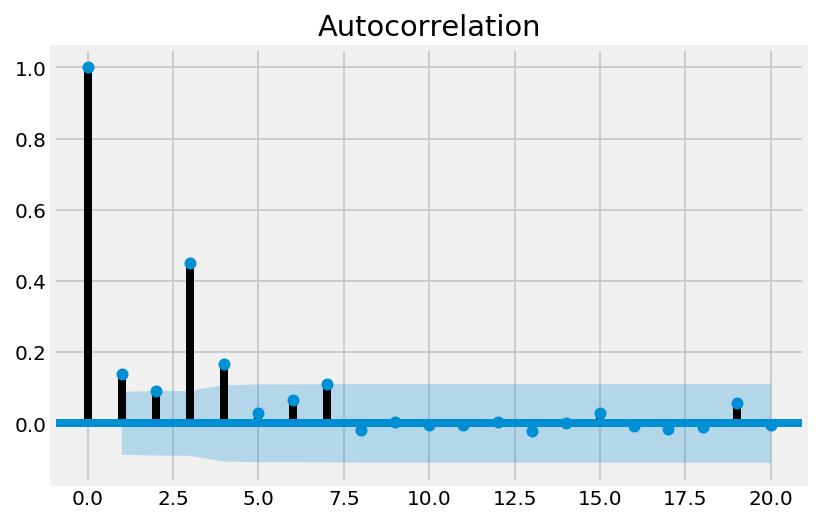

In [18]:
plot_acf(res.resid.dropna()**2, lags=20)
plt.show()

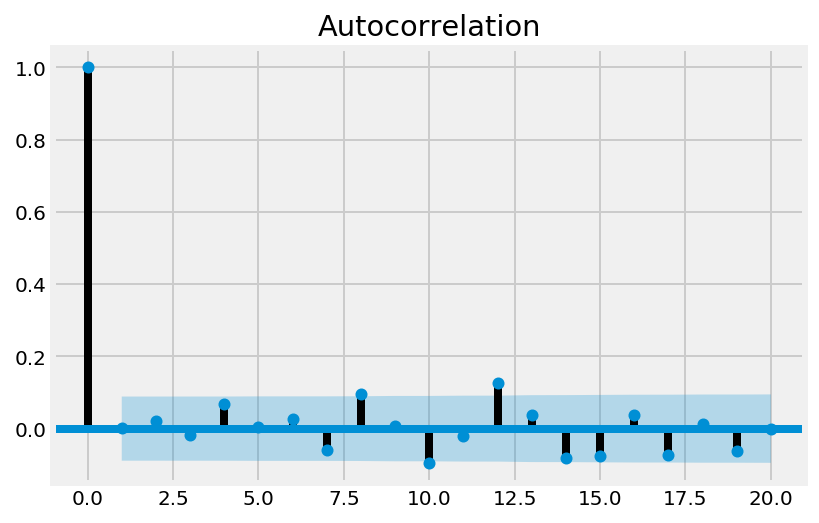

In [19]:
plot_acf(resid_standardized.dropna(), lags=20)
plt.show()

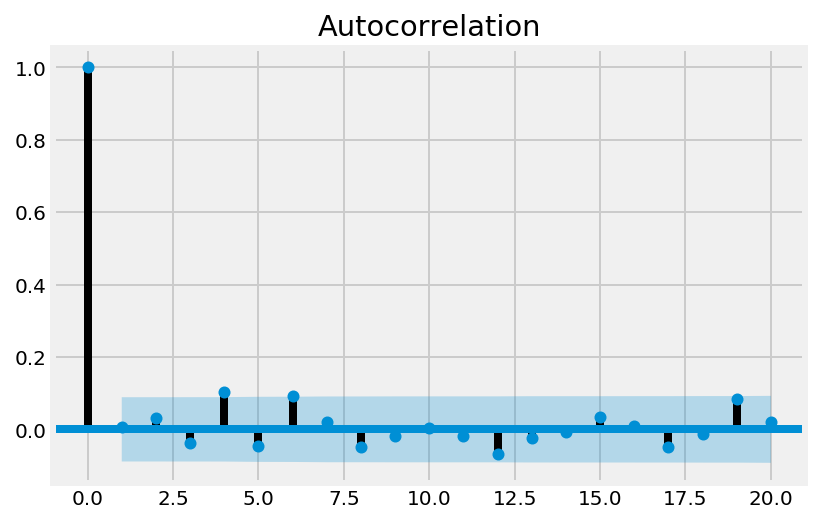

In [20]:
plot_acf(resid_standardized.dropna()**2, lags=20)
plt.show()

### Obtain the model forecasts and plot

In [21]:
forecasts = res.forecast(horizon=5, start=2)

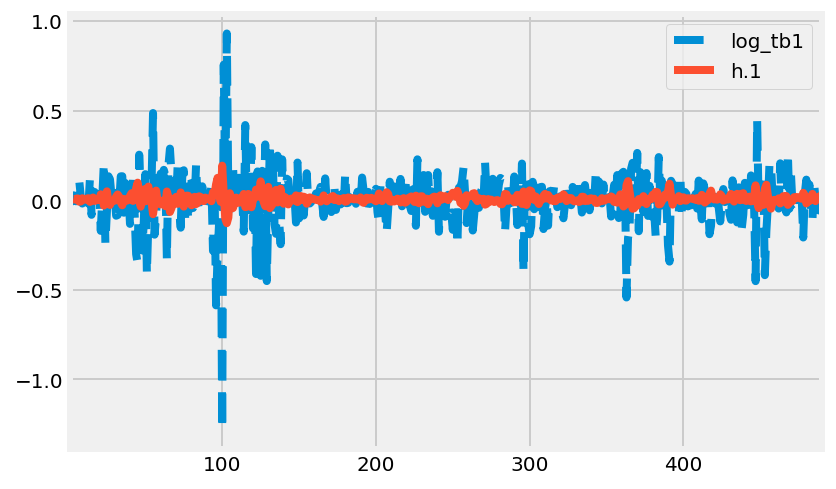

In [22]:
fig, ax = plt.subplots()
data.plot(ax=ax,label='data',ls='--')
forecasts.mean[['h.1']].plot(ax=ax)
ax.legend()
plt.show()

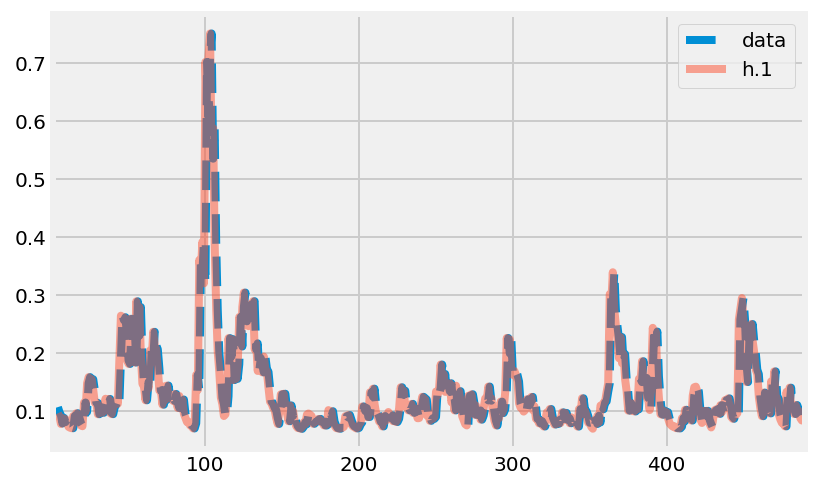

In [23]:
fig, ax = plt.subplots()
res.conditional_volatility.plot(ax=ax,label='data',ls='--')
forecasts.variance[['h.1']].apply(np.sqrt).plot(ax=ax,alpha=0.5)
ax.legend()
plt.show()

### Produce a hedgehog plot for the predicted means and volatilities

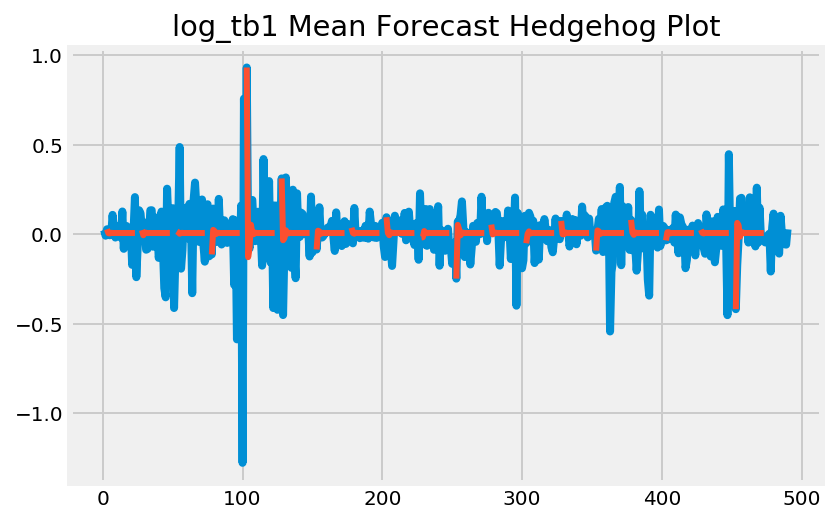

In [24]:
res.hedgehog_plot(horizon=20, step=25, type='mean')
plt.show()

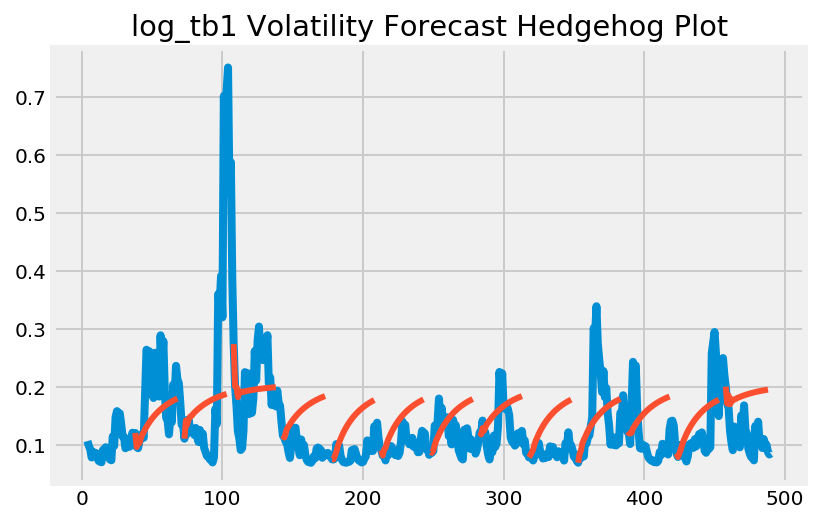

In [25]:
res.hedgehog_plot(horizon=30, step=35, type='volatility')
plt.show()

### Choose variables from the data frame to be regressed on each other. Fit an ARX or GARCH  model taking exogenous variables into account and analyse your model in the same way as above.

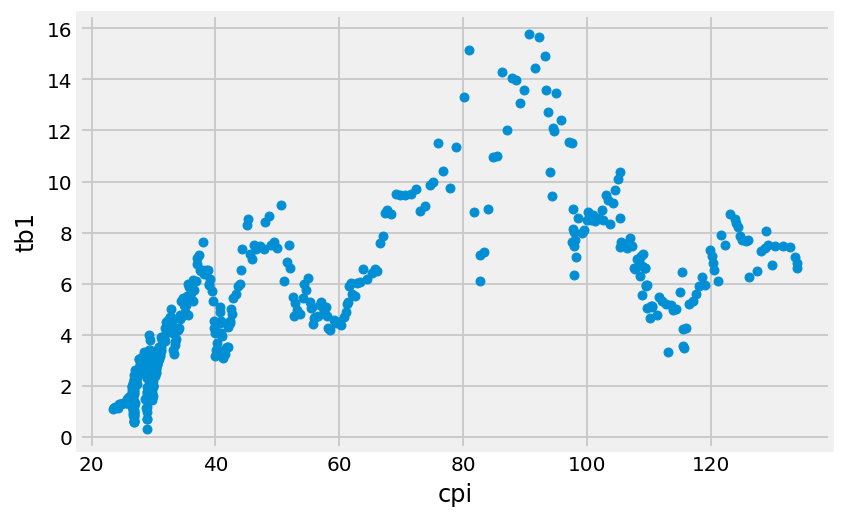

In [26]:
df.plot(kind='scatter',y='tb1',x='cpi')
plt.show()

In [27]:
from arch.univariate import ARX

X = df[['cpi']][1:]
X = (X-X.mean())/X.std()
ar = ARX(data, X, lags = 3, constant=False)
ar.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    AR-X - Constant Variance Model Results                    
==============================================================================
Dep. Variable:                log_tb1   R-squared:                       0.034
Mean Model:                      AR-X   Adj. R-squared:                  0.028
Vol Model:          Constant Variance   Log-Likelihood:                243.022
Distribution:                  Normal   AIC:                          -476.043
Method:            Maximum Likelihood   BIC:                          -455.102
                                        No. Observations:                  487
Date:                Tue, Aug 20 2019   Df Residuals:                      482
Time:                        08:59:15   Df Model:                            5
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
log_tb1[1]     -0.1693  8.506e-02     -1.990  4.659e-02   [ -0.336,-2.559e-03]
log_tb1[2]     -0.0244  6.603e-02     -0.370      0.711      [ -0.154,  0.105]
log_tb1[3]     -0.0752      0.112     -0.669      0.504      [ -0.296,  0.145]
cpi        -4.3294e-03  6.484e-03     -0.668      0.504 [-1.704e-02,8.380e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
sigma2         0.0216  4.010e-03      5.382  7.382e-08 [1.372e-02,2.944e-02]
============================================================================

Covariance estimator: White's Heteroskedasticity Consistent Estimator
"""

In [28]:
am = arch_model(data, x=X, mean='ARX', lags=3, vol='GARCH', p=3, q=3)
res = am.fit()
res.summary()

Iteration:      1,   Func. Count:     14,   Neg. LLF: -330.7743571659605
Iteration:      2,   Func. Count:     33,   Neg. LLF: -331.3057759007822
Iteration:      3,   Func. Count:     50,   Neg. LLF: -333.8039952059166
Iteration:      4,   Func. Count:     69,   Neg. LLF: -333.92589581184393
Iteration:      5,   Func. Count:     84,   Neg. LLF: -342.8632062994968
Iteration:      6,   Func. Count:     99,   Neg. LLF: -347.30294767486214
Iteration:      7,   Func. Count:    115,   Neg. LLF: -347.78272535625047
Iteration:      8,   Func. Count:    130,   Neg. LLF: -349.7626020518009
Iteration:      9,   Func. Count:    145,   Neg. LLF: -351.1872727153483
Iteration:     10,   Func. Count:    160,   Neg. LLF: -351.9577039477683
Iteration:     11,   Func. Count:    175,   Neg. LLF: -352.45575969646904
Iteration:     12,   Func. Count:    190,   Neg. LLF: -353.3705954411555
Iteration:     13,   Func. Count:    206,   Neg. LLF: -353.6217108397827
Iteration:     14,   Func. Count:    221,   Neg

<class 'statsmodels.iolib.summary.Summary'>
"""
                          AR-X - GARCH Model Results                          
==============================================================================
Dep. Variable:                log_tb1   R-squared:                       0.009
Mean Model:                      AR-X   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                354.532
Distribution:                  Normal   AIC:                          -685.063
Method:            Maximum Likelihood   BIC:                          -634.804
                                        No. Observations:                  487
Date:                Tue, Aug 20 2019   Df Residuals:                      475
Time:                        08:59:15   Df Model:                           12
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const      8.4100e-03  4.925e-03      1.708  8.770e-02 [-1.243e-03,1.806e-02]
log_tb1[1]    -0.1820  6.118e-02     -2.975  2.931e-03   [ -0.302,-6.210e-02]
log_tb1[2]    -0.1380  5.562e-02     -2.481  1.309e-02   [ -0.247,-2.900e-02]
log_tb1[3] 5.4130e-03  5.764e-02  9.391e-02      0.925      [ -0.108,  0.118]
cpi           -0.0121  6.860e-03     -1.764  7.766e-02 [-2.555e-02,1.341e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.6802e-03  1.535e-03      1.746  8.084e-02 [-3.288e-04,5.689e-03]
alpha[1]       0.2640      0.104      2.528  1.146e-02    [5.937e-02,  0.469]
alpha[2]       0.0808      0.315      0.256      0.798      [ -0.537,  0.699]
alpha[3]       0.2048      0.439      0.467      0.641      [ -0.655,  1.065]
beta[1]        0.3791      0.589      0.643      0.520      [ -0.776,  1.534]
beta[2]        0.0000      1.186      0.000      1.000      [ -2.325,  2.325]
beta[3]        0.0000      0.520      0.000      1.000      [ -1.020,  1.020]
=============================================================================

Covariance estimator: robust
"""

In [29]:
data_1 = get_rdataset('CRSPday', package='Ecdat')
df_1 = data_1.data
df_1.head()

,year,month,day,ge,ibm,mobil,crsp
0,1989,1,3,-0.016760,0.000000,-0.002747,-0.007619
1,1989,1,4,0.017045,0.005128,0.005510,0.013016
2,1989,1,5,-0.002793,-0.002041,0.005479,0.002815
3,1989,1,6,0.000000,-0.006135,0.002725,0.003064
4,1989,1,9,0.000000,0.004115,0.005435,0.001633


In [30]:
data = df_1[['ge']]
X = df_1[['crsp']]
am = arch_model(data, x=X, mean='ARX', lags=3, vol='GARCH', p=3, q=3)
res = am.fit(options={'maxiter':2000, 'ftol':0.0001})
res.summary()

Iteration:      1,   Func. Count:     14,   Neg. LLF: -8212.296938238214
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -8212.35260513788
            Iterations: 1
            Function evaluations: 23
            Gradient evaluations: 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                          AR-X - GARCH Model Results                          
==============================================================================
Dep. Variable:                     ge   R-squared:                       0.516
Mean Model:                      AR-X   Adj. R-squared:                  0.515
Vol Model:                      GARCH   Log-Likelihood:                8212.35
Distribution:                  Normal   AIC:                          -16400.7
Method:            Maximum Likelihood   BIC:                          -16330.7
                                        No. Observations:                 2525
Date:                Tue, Aug 20 2019   Df Residuals:                     2513
Time:                        08:59:17   Df Model:                           12
                                  Mean Model                                  
==============================================================================
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const      4.0650e-04  1.761e-04      2.309  2.095e-02   [6.144e-05,7.516e-04]
ge[1]         -0.0596  1.666e-02     -3.578  3.461e-04 [-9.224e-02,-2.695e-02]
ge[2]         -0.0372  1.560e-02     -2.385  1.710e-02 [-6.777e-02,-6.625e-03]
ge[3]         -0.0265  1.509e-02     -1.758  7.880e-02  [-5.609e-02,3.051e-03]
crsp           1.2719  2.905e-02     43.790      0.000       [  1.215,  1.329]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.8209e-06  4.081e-12  4.462e+05      0.000  [1.821e-06,1.821e-06]
alpha[1]       0.0167  1.737e-02      0.960      0.337 [-1.737e-02,5.070e-02]
alpha[2]       0.0167  1.929e-02      0.864      0.388 [-2.114e-02,5.448e-02]
alpha[3]       0.0167  1.361e-02      1.225      0.221 [-1.000e-02,4.334e-02]
beta[1]        0.3100      0.826      0.375      0.707      [ -1.309,  1.929]
beta[2]        0.3100      0.288      1.075      0.282      [ -0.255,  0.875]
beta[3]        0.3100      0.922      0.336      0.737      [ -1.498,  2.118]
=============================================================================

Covariance estimator: robust
"""

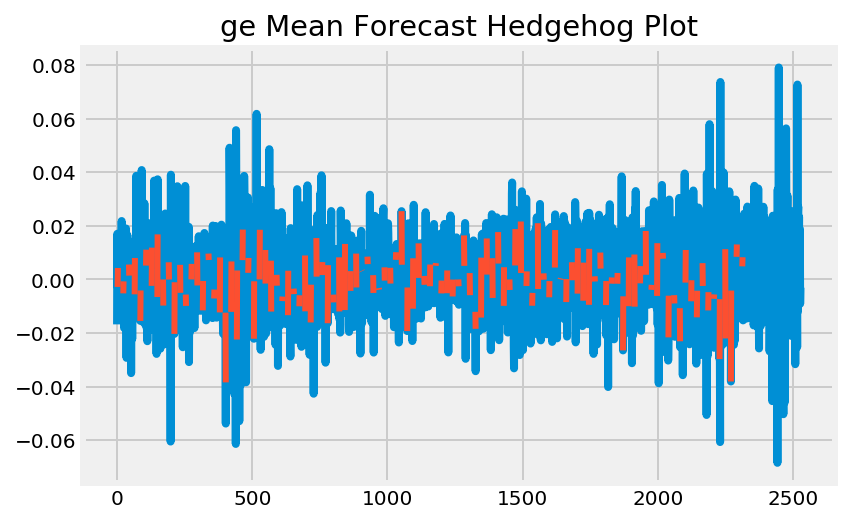

In [31]:
res.hedgehog_plot(horizon=200, step=21, type='mean')
plt.show()

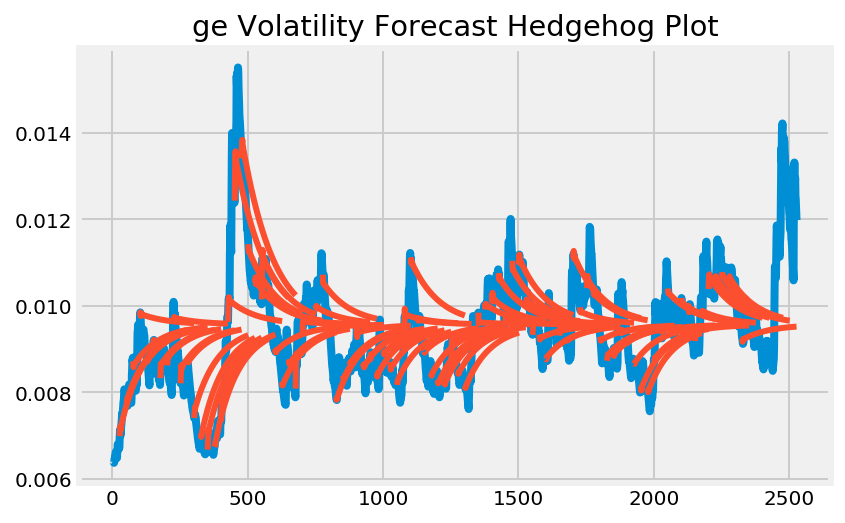

In [32]:
res.hedgehog_plot(horizon=200, step=25, type='volatility')
plt.show()